In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v4 import *
import sklearn
import sklearn.datasets, sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
np.random.seed(1)

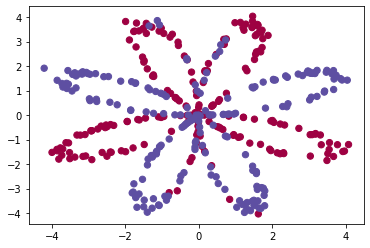

In [2]:
x,y = load_planar_dataset()
plt.scatter(x[0,:],x[1,:],c = y, s=40, cmap= plt.cm.Spectral)

In [3]:
print("X shape = " + str(x.shape) + " Y shape = " + str(y.shape))
print("Number of training examples = " + str(y.shape[1]))

X shape = (2, 400) Y shape = (1, 400)
Number of training examples = 400


In [4]:
log_reg = sklearn.linear_model.LogisticRegressionCV()
log_reg.fit(x.T, y.T)


C:\Users\meetd\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegressionCV()

Text(0.5, 1.0, 'Logistic Regression')

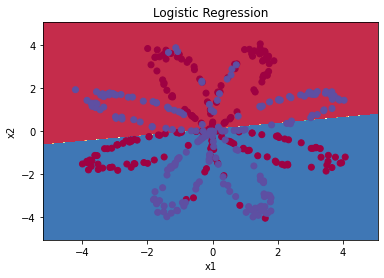

In [5]:
plot_decision_boundary(lambda x: log_reg.predict(x), x, y)
plt.title("Logistic Regression")


In [6]:
LR_predictions = log_reg.predict(x.T)
print("Accuracy of logistic regression %f" %float((np.dot(y,LR_predictions) + np.dot(1-y, 1-LR_predictions)) / float(y.size) * 100) +  "%" + "(percentage of correctly labelled data points)")

Accuracy of logistic regression 47.000000%(percentage of correctly labelled data points)


In [7]:
def layer_sizes(x,y):
    n_x = x.shape[0]
    n_h = 4
    n_y = y.shape[0]
    return(n_x, n_h, n_y)


In [8]:
x_assess , y_assess = layer_sizes_test_case()
(n_x , n_h , n_y) = layer_sizes(x_assess , y_assess)
print("The size of the input layers is: n_x = " + str(n_x))
print("The size of the hidden layers is: n_h = " + str(n_h))
print("The size of the output layers is: n_y = " + str(n_y))

The size of the input layers is: n_x = 5
The size of the hidden layers is: n_h = 4
The size of the output layers is: n_y = 2


In [9]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    w1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    w2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))
    parameters = {"W1" : w1,
                  "b1" : b1,
                  "W2" : w2,
                  "b2" : b2}
    return parameters

In [10]:
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.41675785 -0.05626683]
 [-2.1361961   1.64027081]
 [-1.79343559 -0.84174737]
 [ 0.50288142 -1.24528809]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-1.05795222 -0.90900761  0.55145404  2.29220801]]
b2 = [[0.]]


In [11]:
print(x.shape, parameters["W1"].shape)

(2, 400) (4, 2)


In [12]:
def forward_propagation(x, parameters):
    w1 = parameters["W1"]
    b1 = parameters["b1"]
    w2 = parameters["W2"]
    b2 = parameters["b2"]
    
    z1 = np.dot(w1,x) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(w2,a1) + b2
    a2 = sigmoid(z2)
    cache = {"z1" : z1,
             "A1" : a1,
             "z2" : z2,
             "A2" : a2}
    return a2, cache
    

In [13]:
x_assess , parameters = forward_propagation_test_case()
a2, cache = forward_propagation(x_assess, parameters)
print(np.mean(cache['z1']),np.mean(cache['A1']),np.mean(cache['z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


In [14]:
def compute_cost(a2, y, parameters):
    m = y.shape[1]
    w1 = parameters["W1"]
    w2 = parameters["W2"]
    logprobs = np.multiply(np.log(a2),y) + np.multiply((1-y),np.log(1-a2))
    cost = - np.sum(logprobs)/m
    cost = np.squeeze(cost)
    return cost


In [15]:
a2, y_assess, parameters = compute_cost_test_case()
print("Cost = " + str(compute_cost(a2,y_assess, parameters)))

Cost = 0.6930587610394646


In [16]:
def backward_propagation(parameters, cache, x ,y):
    m = x.shape[1]
    w1 = parameters["W1"]
    w2 = parameters["W2"]
    a1 = cache["A1"]
    a2 = cache["A2"]
    dz2 = a2 - y
    dw2 = (1 / m) * np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims= True)/m
    dz1 = np.multiply(np.dot(w2.T, dz2), 1- np.power(a1,2))
    dw1 = np.dot(dz1, x.T)/m
    db1 = np.sum(dz1,axis=1, keepdims =True)
    grads = {"dW1": dw1,
             "db1": db1,
             "dW2": dw2,
             "db2": db2}
    
    return grads

In [17]:
parameters, cache, x_assess, y_assess = backward_propagation_test_case()
grads = backward_propagation(parameters, cache, x_assess, y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00528604]
 [ 0.00452984]
 [-0.00275209]
 [-0.01144265]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [18]:
def update_parameters(parameters, grads, learning_rate=0.005):
    w1 = parameters["W1"]
    w2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    dw1 = grads["dW1"]
    dw2 = grads["dW2"]
    db1 = grads["db1"]
    db2 = grads["db2"]
    w1 = w1 - learning_rate * dw1
    w2 = w2 - learning_rate * dw2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    parameters = {"W1" : w1,
                  "W2" : w2,
                  "b1" : b1,
                  "b2" : b2}
    return parameters

In [19]:
parameters , grads = update_parameters_test_case()
parameters = update_parameters(parameters,grads)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00615156  0.01691237]
 [-0.02312203  0.03140625]
 [-0.01692011 -0.01753977]
 [ 0.009359   -0.05022271]]
b1 = [[-8.98051305e-07]
 [ 8.17471164e-06]
 [ 6.05761409e-07]
 [-2.54833934e-06]]
W2 = [[-0.01043181 -0.04020858  0.01607839  0.04441534]]
b2 = [[9.15498994e-05]]


In [20]:
def nn_model(x,y,n_h,num_iterations=10000,print_cost=True):
    np.random.seed(3)
    n_x = layer_sizes(x,y)[0]
    n_y = layer_sizes(x,y)[2]
    parameters = initialize_parameters(n_x, n_h, n_y)
    w1 = parameters["W1"]
    w2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    for i in range(0, num_iterations):
        a2, cache = forward_propagation(x, parameters)
        cost = compute_cost(a2, y, parameters)
        grads = backward_propagation(parameters,cache,x,y)
        parameters = update_parameters(parameters, grads)
        if (print_cost)and(i%5000==0):
            print("Cost after iteration %i = %f" %(i,cost))
    return parameters

In [21]:
x_assess, y_assess = nn_model_test_case()
parameters = nn_model(x,y,n_h,num_iterations= 100000,print_cost =True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0 = 1.127380
Cost after iteration 5000 = 0.473155
Cost after iteration 10000 = 0.380610
Cost after iteration 15000 = 0.353922
Cost after iteration 20000 = 0.339646
Cost after iteration 25000 = 0.330420
Cost after iteration 30000 = 0.323828
Cost after iteration 35000 = 0.318816
Cost after iteration 40000 = 0.314839
Cost after iteration 45000 = 0.311579
Cost after iteration 50000 = 0.308839
Cost after iteration 55000 = 0.306487
Cost after iteration 60000 = 0.304434
Cost after iteration 65000 = 0.302617
Cost after iteration 70000 = 0.300988
Cost after iteration 75000 = 0.299515
Cost after iteration 80000 = 0.298172
Cost after iteration 85000 = 0.296938
Cost after iteration 90000 = 0.295796
Cost after iteration 95000 = 0.294736
W1 = [[-0.01541764 -3.16540974]
 [-3.06825775  3.9503537 ]
 [-2.71234258 -3.17644527]
 [-0.02359182 -1.7132832 ]]
b1 = [[-0.10789095]
 [-0.0409439 ]
 [-0.14370453]
 [-3.63910818]]
W2 = [[-5.50407075 -3.51261251  3.39747498  0.70453732]]
b2 = [[0

In [22]:
def predict(parameters, x):
    a2 , cache = forward_propagation(x, parameters)
    predictions = np.round(a2)
    return predictions

In [23]:
parameters , x_assess = predict_test_case()
predictions = predict(parameters , x_assess)
print("Predictions mean = " + str(np.mean(predictions)))

Predictions mean = 0.6666666666666666


Cost after iteration 0 = 1.127380


Text(0.5, 1.0, 'Decision boundary for hidden layer size 4')

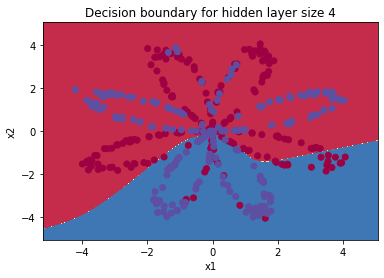

In [24]:
parameters = nn_model(x,y,n_h=4,num_iterations =1000,print_cost=True)
plot_decision_boundary(lambda x:predict(parameters,x.T),x,y)
plt.title("Decision boundary for hidden layer size " + str(4))

In [25]:
predictions = predict(parameters, x)
print("Accuracy %d " %float((np.dot(y, predictions.T) + np.dot(1-y, 1-predictions.T))/ float(y.size) * 100) + "%") 


Accuracy 61 %


Cost after iteration 0 = 0.887698
Cost after iteration 5000 = 0.674148
Cost after iteration 10000 = 0.676174
Cost after iteration 15000 = 0.674845
Cost after iteration 20000 = 0.674784
Cost after iteration 25000 = 0.674723
Cost after iteration 30000 = 0.674660
Cost after iteration 35000 = 0.674595
Cost after iteration 40000 = 0.674529
Cost after iteration 45000 = 0.674460
Accuracy for 1 hidden units = 49.75 %
Cost after iteration 0 = 0.873833
Cost after iteration 5000 = 0.608419
Cost after iteration 10000 = 0.604688
Cost after iteration 15000 = 0.602214
Cost after iteration 20000 = 0.600573
Cost after iteration 25000 = 0.599446
Cost after iteration 30000 = 0.598592
Cost after iteration 35000 = 0.597901
Cost after iteration 40000 = 0.597322
Cost after iteration 45000 = 0.596825
Accuracy for 2 hidden units = 70.25 %
Cost after iteration 0 = 0.817689
Cost after iteration 5000 = 0.582514
Cost after iteration 10000 = 0.575737
Cost after iteration 15000 = 0.570310
Cost after iteration 20000 

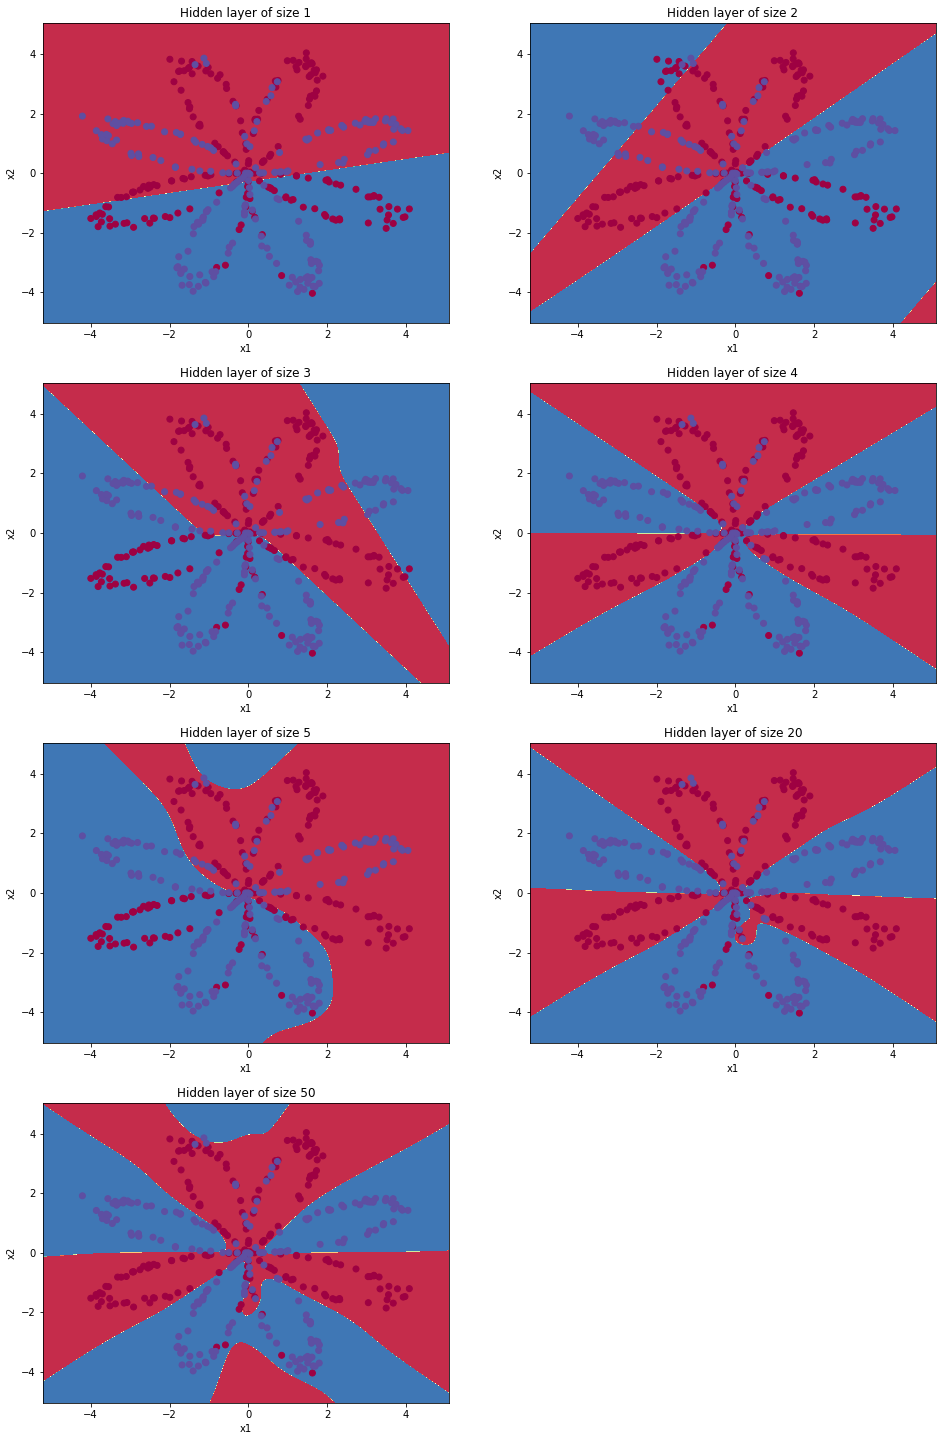

In [26]:
plt.figure(figsize = (16,32))
hidden_layer_sizes = [1,2,3,4,5,20,50]
for i,n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5,2,i+1)
    plt.title("Hidden layer of size %d" %n_h)
    parameters = nn_model(x,y,n_h,num_iterations=50000)
    plot_decision_boundary(lambda x:predict(parameters,x.T),x,y)
    predictions = predict(parameters,x)
    accuracy = float((np.dot(y,predictions.T) + np.dot(1-y, 1-predictions.T)) / float(y.size) * 100)
    print("Accuracy for {} hidden units = {} %".format(n_h,accuracy))

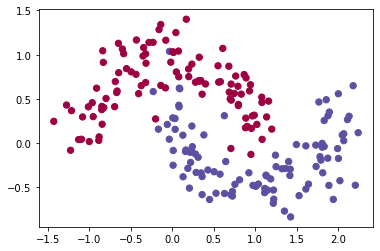

In [28]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()
datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles":gaussian_quantiles}
dataset = "noisy_moons"
x,y = datasets[dataset]
x,y = x.T, y.reshape(1,y.shape[0])
if dataset == "blobs":
    y = y % 2
plt.scatter(x[0,:],x[1,:],c=y,s=40,cmap=plt.cm.Spectral);
